<a href="https://colab.research.google.com/github/Jmorgado125/ADA-Informes/blob/main/QuickSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# QUICK SORT

#1. Descripcion del problema

##Problema de Ordenamiento de valores dentro de un arreglo

*    **Entrada:**Secuencia de numeros $a_n$ sin ningun requisito de orden en la entrada $[a_1',a_2',...,a_n']$.
*    **Salida:**Intercambio ordenado de los valores dentro de la secuencia , de manera que $[a_1 < a_2 < a_3 ... <a_n]$ de menor a mayor, o $[a_1 > a_2 > a_3 ... >a_n]$.

![image](https://imgur.com/9SjgGWx.png)

El algoritmo a estudiar **Quick Sort** permite la organizacion de valores y da solucion al problema.El **Quicksort** es un algoritmo de ordenamiento que tiene un tiempo de ejecución en el **peor caso** de $O(n^2)$. A pesar de ello, es un algoritmo bastante utilizado gracias a su desempeño esperado en el **caso promedio** de $Θ(n log n)$.  Además, los **factores ocultos** tras la notación son bastante pequeños.


#2.Descripcion del algoritmo

Quicksort aplica el paradigma **divide-y-vencerás**.

Para ordenar un arreglo A[p..r], se realizan los siguientes procesos:

- Se **divide** el arreglo en 2 sub-arreglos: A[p..q-1] y A[q+1..r] de tal forma que todos los elementos de A[p..q-1] son menores o iguales a q. A su vez los elmentos de A[q+1..r] son mayores o iguales a q.
- Se llama a **quicksort** para ordenar los subarreglos A[p..q-1] y A[q+1..r]
- Nada más que hacer, el arreglo **ya se encuentra ordenado**: A[p..q-1]; A[q]; A[q+1..r].

Algoritmo(Pseudocodigo).

![image](https://imgur.com/1Z0gFpL.png)

Como podrán imaginar, la parte importante es realizada por la función **Partition**.

##2.1 Implementacion funcion **Partition**.


>1.Debemos seleccionar cuatro indices, donde 1 de ellos es nuestro
**pivote** (x).
>
>2.Revisar si A[j] es **mayor o menor que x**. 
>
>3.**Si es mayor**, está todo bien.
>
>4.**Si es menor o igual**, intercambiamos A[j] con A[i+1] y avanzamos i.
>
>5.En cualquier avanzamos j=j+1.

### ⨀ Seleccionando como pivote el último elemento del arreglo.


In [56]:
def partitionHigh(array, low, high,cont):
  
  pivot = array[high]   #Eleccion de pivote, como el ultimo elemento
  i = low - 1
  ct=cont   
  for j in range(low, high):
    ct=ct+1
    if array[j] <= pivot:
      ct=ct+1
      i = i + 1
      (array[i], array[j]) = (array[j], array[i])
  
  (array[i + 1], array[high]) = (array[high], array[i + 1])
  
  return i + 1, ct                                                                         

### ⨀ Seleccionando como pivote el primer elemento del arreglo

In [99]:
def partitionLow(arr, l, h,cont):
  low, high = l, h
  if l != h and l < h:
    ct=cont
    pivot = arr[l]
    low = low+1
    while low <= high:
      ct=ct+1
      if arr[high] < pivot and arr[low] > pivot:
        ct=ct+1
        arr[high], arr[low] = arr[low], arr[high]
      if not arr[low] > pivot:
        ct=ct+1
        low += 1
      if not arr[high] < pivot:
        ct=ct+1
        high -= 1
  arr[l], arr[high] = arr[high], arr[l]
  return high,ct

### ⨀ Seleccionando como pivote la mediana de tres elementos al azar del arreglo.

In [ ]:
#definiremos una funcion que nos retorne un pivote que sea la mediana de otros 3



##2.2 Implementacion Algoritmo **QuickSort**

In [82]:
def quick_sort(array, low, high):
  cont=0
  if low < high:
    pi,cont = partitionHigh(array, low, high,cont)
    quick_sort(array, low, pi - 1)
    quick_sort(array, pi + 1, high)
    return cont
  
    
  
array = [ 9,-3,5,2,6,8,-6,1,3]
print("Arreglo inicial :",array)
cont=quick_sort(array, 0, len(array) - 1)
print("Arreglo Ordenado :",array)
print("Comparaciones :",cont)
  

      

Arreglo inicial : [9, -3, 5, 2, 6, 8, -6, 1, 3]
Arreglo Ordenado : [-6, -3, 1, 2, 3, 5, 6, 8, 9]
Comparaciones : 12


#3. Correctitud

##3.1 Correctitud funcion Partition


Teorema : *El algoritmo Partitionun recibe un arreglo A[p..r], lo reorganiza y retorna un índice [q] de tal forma que los elementos del arreglo A[p..q-1] son menores o iguales a A[q] y los elementos del arreglo A[q+1..r] son mayores a A[q].*

Para probar usaremos la propiedad de bucle invariante.

Lema: 
Al comienzo de cada iteración, se cumple que para cualquier índice k, si este esta entre p≤k≤i, entonces A[k]< A[R] (pivote), y si esta i<k<j entonces A[k]> A[R] (pivote).

![image](https://imgur.com/UXNmpol.png)



##3.2 Correctitud Algoritmo QuickSort

Teorema: *se supone la correctitud del algoritmo básico, y se prueba por
inducción sobre el tamaño de la instancia que la solución
obtenida es correcta suponiendo la correctitud de las instancias
más chicas.*

Esto quiere decir que, suponiendo la correctitud de la particion en el Arreglo $A[n]$, notamos que la primera mitad resultante de la particion "($A[n/2]$≤(pivote))", contiene elementos menores, que la segunda mitad "((pivote)<$A[n/2])", El algoritmo al ser recursivo, constantemente se va corroborando la correctitud para las subdivisones de un Arreglo.

![image](https://imgur.com/1Z0gFpL.png)

*En la imagen podemos ver que el algoritmo recursivo, llama a la primera mitad que resulta del partition, y luego a la segunda mitad.*

# 4. Tiempo de ejecución

### **Teorema (Tiempo de ejecución).**

*El algoritmo **QuickSort** tiene un **tiempo de ejecución de** $O(n log n)$ en su mejor caso (igual el caso promedio) y $O(n)$ en el peor caso.*

## Prueba del teorema


⨀ El mejor de los casos ocurre cuando el proceso de partición siempre elige el elemento central como pivote. este proceso se puede observar en la siguiente funcion de recurrencia.

>$T(n)=T(n/2)+O(n)$

En este caso la solucion, va dividiendo el problema constantemente en 2, casi como un MergeSort, pero a diferencia de este el QuickSort es más rápido en la práctica, porque su ciclo interno se puede implementar de manera eficiente en la mayoría de las arquitecturas y en la mayoría de los datos del mundo real.


⨀ El peor de los casos ocurre cuando el proceso de partición siempre elige el elemento más grande o más pequeño como pivote. y segun este metodo de eleccion el peor caso ocurriría cuando la matriz ya esté ordenada en orden creciente o decreciente. La siguiente funcion de recurrencia corresponde a lo que sucede en el peor caso.

>$T(n)=T(n-1)+O(n)$







In [67]:
##Prueba En el Peor Caso elijiendo el ultimo elemento

arr=[1,2,3,4,5,6,7,8]
print("=======================================")
print("Arreglo inicial ordenado de manera creciente :",arr)
cont=quick_sort(arr, 0 , len(arr)-1,cont=0)
print("Arreglo de salida :",arr)
print("Num de Comparaciones :",cont)
arr2=[2,4,1,3,5,8,7,6]
print("=======================================")
print("Arreglo sin orden :",arr2)
cont=quick_sort(arr2, 0 , len(arr)-1,cont=0)
print("Arreglo de salida :",arr2)
print("Num de Comparaciones :",cont)


Arreglo inicial ordenado de manera creciente : [1, 2, 3, 4, 5, 6, 7, 8]
Arreglo de salida : [1, 2, 3, 4, 5, 6, 7, 8]
Num de Comparaciones : 14
Arreglo sin orden : [2, 4, 1, 3, 5, 8, 7, 6]
Arreglo de salida : [1, 2, 3, 4, 5, 6, 7, 8]
Num de Comparaciones : 12


#5. Experimentacion

#5.1 Comparar el número de comparaciones realizadas experimentalmente con el mejor y peor caso teóricos.



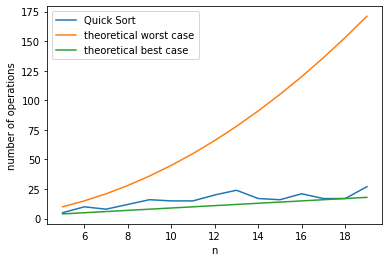

In [84]:
import matplotlib.pyplot as plt
import random

x=[n for n in range(5,20)] 
y1=[n*(n-1)/2 for n in range(5,20)] # worst case
y2=[n-1 for n in range(5,20)] # best case
y=[]; 

for n in range(5,20):
  a = random.sample(range(1, 100), n)
  counter = quick_sort(a,0,len(a)-1)
  y.append(counter)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Quick Sort", "theoretical worst case", "theoretical best case"])

plt.xlabel('n')
plt.ylabel('number of operations')
plt.show()

En esta experimentacion podemos observar como, el caso promedio de utilizacion del quicksort es bien parecido al mejor de los caso, ademas vemos como el peor caso, la utilizacion del quicksort no es optima.

#5.2 Comparar el algoritmo QuickSort, con MergeSort.

Implementacion Funcion Merge para la comparacion.

In [93]:
def Merge(A,p,q,r):
  arr_B = []
  c = 0                
  cpy_q = q            
  cpy_p = p            
  q+= 1                
  while p != cpy_q+1 and q != r+1:
    c += 1
    if A[p] <= A[q] : arr_B.append(A[p]) ; p+= 1   
    elif A[q] < A[p] : arr_B.append(A[q]) ; q+= 1  
  if p == cpy_q+1:                                
    arr_B += A[q:r+1]
  elif  q == r+1:
    arr_B += A[p:cpy_q+1]
  A[cpy_p:r+1] = arr_B                             
  return arr_B , c


In [95]:
def MergeSort(A, p, r, c = 0, i = 1, steps = 0, verbose = False):
   queue = []                  
   queue.append((A[p:r+1], i, steps)) 
   if p==r: return c, queue      
   q = int((p+r)/2)              
   c_izq, q_izq = MergeSort(A,p,q,i=i+1, steps = queue[-1][2]+1 ,verbose = verbose)   
   if verbose == True:
     for j in q_izq:
      queue.append(j)         
   c_der, q_der = MergeSort(A,q+1,r,i=i+1,steps = queue[-1][2]+1 ,verbose = verbose)   
   if verbose == True:
     for j in q_der:
        queue.append(j)
   b,c = Merge(A,p,q,r)            
   if verbose == True:
     queue.append((b,f"merge",queue[-1][2]+1))
   c += c_izq+c_de
   if i == 1 and verbose == True:
     mrgs = 1
     prev = -1
     for i in queue:
       if i[2] == 0 : 
         print(f"Arreglo inicial: {i[0]}\n") 
         prev = i[1]
         continue
       print(f"Paso {i[2]}")
       if i[1] == "merge": 
         print(f"Se ha realizado el Merge nº{mrgs}!")
         print(f"Arreglos ordenados y unidos:") 
         mrgs+=1
       else:
         print("Se ha dividido el arreglo!")
       print(i[0], "\n")
       print("-------------------------------------")
     print()
     print(f"Total comparaciones: {c}")
     print("Arreglo ordenado!")
   
   return c, queue

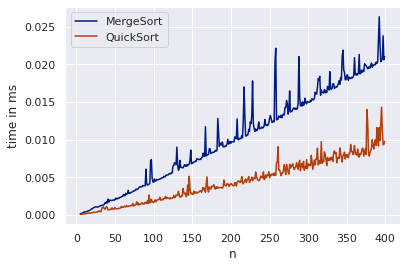

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from timeit import repeat

%matplotlib inline

sns.set(context='notebook', style='darkgrid', palette='dark')

x=[]; x2 =[]
y=[]; y2=[]

for n in range(5,400):

  a = random.sample(range(1, 1000), n)
  t = repeat(setup="from __main__ import MergeSort", stmt=f"MergeSort({a},{0},{len(a)-1})", repeat=1, number=10)

  x.append(n)
  y.append(t)

for n in range(5,400):

  a = random.sample(range(1, 1000), n)
  t = repeat(setup="from __main__ import quick_sort", stmt=f"quick_sort({a},{0},{len(a)-1})", repeat=1, number=10)

  x2.append(n)
  y2.append(t)

plt.plot(x,y)
plt.plot(x2,y2)
plt.legend(["MergeSort", "QuickSort"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

Podemos ver en los resultados, de que a pesar de tener la misma complejidad $O(n logn$) , en la practica el QuickSort es mas eficiente que el MergeSort.

#5.3 Comparar el rendimiento del algoritmo al modificar la selección del pivote 

In [102]:
def quick_sortLow(array, low, high):
  cont=0
  if low < high:
    pi,cont = partitionLow(array, low, high,cont)
    quick_sortLow(array, low, pi - 1)
    quick_sortLow(array, pi + 1, high)
    return cont

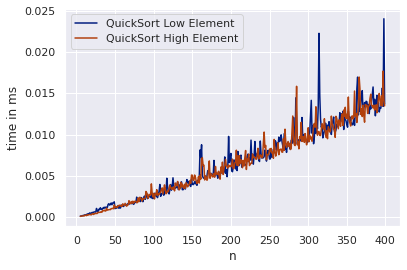

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from timeit import repeat

%matplotlib inline

sns.set(context='notebook', style='darkgrid', palette='dark')

x=[]; x2 =[]
y=[]; y2=[]

for n in range(5,400):

  a = random.sample(range(1, 1000), n)
  t = repeat(setup="from __main__ import quick_sortLow", stmt=f"quick_sortLow({a},{0},{len(a)-1})", repeat=1, number=10)

  x.append(n)
  y.append(t)

for n in range(5,400):

  a = random.sample(range(1, 1000), n)
  t = repeat(setup="from __main__ import quick_sort", stmt=f"quick_sort({a},{0},{len(a)-1})", repeat=1, number=10)

  x2.append(n)
  y2.append(t)

plt.plot(x,y)
plt.plot(x2,y2)
plt.legend(["QuickSort Low Element", "QuickSort High Element"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

En este grafico observamos que elijiendo el ultimo o primer elemento de un arreglo, el algoritmo no es tan distinto.